In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.colors import *

In [17]:
# details = name,title,scatter label,xlabel,ylabel
def plotting(ax,fig,x,y,ftend,fteo,details):
    name,title,label,xlabel,ylabel = details
    ax.scatter(x,y,color='k',label=label)
    ax.plot(x,ftend(x),color='tab:brown',label='Línea de tendencia')
    ax.plot(x,fteo(x),'tab:orange',linestyle=':',label='Curva teórica')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid()
    plt.legend()
    plt.savefig(name+'.pdf')
    plt.show()

In [4]:
# para definir la función o curva de tendencia
def fitting(f,xdata,ydata,init_par):
    parameters, pcov = curve_fit(f, xdata, ydata,init_par)
    return parameters, lambda x: f(x,*parameters)

# FASE 1

## Temperatura constante T = 50°C

In [137]:
''' datos
    R9: resistencia variable
    V11: voltaje medido '''

R9 = np.arange(100e-3,600e-3,100e-3)
V11 = np.array([0.46,3.46,6.46,9.46,12.5]) 

## Resistencia constante $R_9 = 100\Omega$

In [133]:
''' datos
    T: temperatura variable
    V12: voltaje medido '''

T = np.arange(20,75,5)
V12 = np.array([1.96,1.71,1.46,1.21,0.96,0.71,0.46,0.21,-0.04,-0.29,-0.54])

In [138]:
# Arrays con todas las medidas correspondientes 

R9dat = np.hstack((R9,100*10**(-3)*np.ones_like(T)))
Tdat = np.hstack((50*np.ones_like(R9),T))
V1dat = np.hstack((V11,V12))

In [147]:
# Función a la que deberían tender los datos
def fase1(X,a,b):
    R,T = X
    return a*R + b*T

x1 = (R9dat,Tdat)
init_pars1 = [30,-0.05]
pars1,f1 = fitting(fase1,x1,V1dat,init_pars1)
pars1

array([30.03334682, -0.05085148])

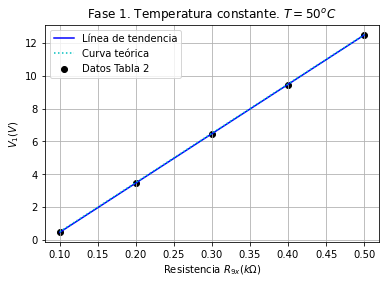

In [148]:
''' plot Resistencia 9 variable
    label: Datos Tabla 2  '''
fig, ax = plt.subplots(1,1)
name = 'Fase1-Tconst'
label = 'Datos Tabla 2'
title = r'Fase 1. Temperatura constante. $T=50^oC$'
xlabel, ylabel = r'Resistencia $R_{9x} (k\Omega)$', r'$V_1 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase1([x,50],*init_pars1)
ftend = lambda x: f1((x,50))

plotting(ax,fig,R9,V11,ftend,fteo,details)

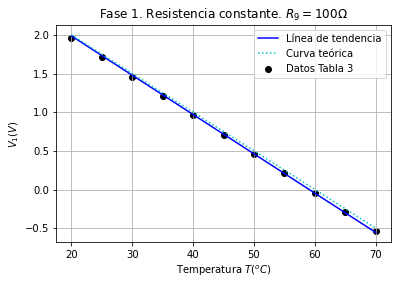

In [146]:
''' plot Temperatura variable
    label: Datos Tabla 3  '''
fig, ax = plt.subplots(1,1)
name = 'Fase1-Rconst'
label = 'Datos Tabla 3'
title = r'Fase 1. Resistencia constante. $R_9=100 \Omega$'
xlabel, ylabel = r'Temperatura $T (^oC)$', r'$V_1 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase1([0.1,x],*init_pars1)
ftend = lambda x: f1((0.1,x))

plotting(ax,fig,T,V12,ftend,fteo,details)

# FASE 2

## Resistencia constante $R_{14}=20k\Omega$

In [24]:
''' datos
    R10: resistencia variable
    V21: voltaje medido '''

R10 = np.arange(0.5,5.5,0.5)
V21 = np.array([0.07,0.17,0.27,0.36,0.46,0.55,0.65,0.74,0.84,0.93])

## Resistencia constante $R_{10x}=2.5k\Omega$

In [25]:
''' datos
    T: temperatura variable
    V22: voltaje medido '''

R14 = np.arange(5,55,5)
V22 = np.array([0.17,0.23,0.29,0.34,0.40,0.46,0.51,0.57,0.63,0.68])

In [26]:
# Arrays con todas las medidas correspondientes 

R10dat = np.hstack((R10,2.5*np.ones_like(R14)))
R14dat = np.hstack((30*np.ones_like(R10),R14))
V2dat = np.hstack((V21,V22))

In [27]:
# Función a la que deberían tender los datos
def fase2(X,a,b):
    r,R = X
    return a*r+b*R*r

x2 = (R10dat,R14dat)
init_pars2 = [0.047619,4.7619e-3]
pars2,f2 = fitting(fase2,x2,V2dat,init_pars2)
pars2

array([0.04732784, 0.00455505])

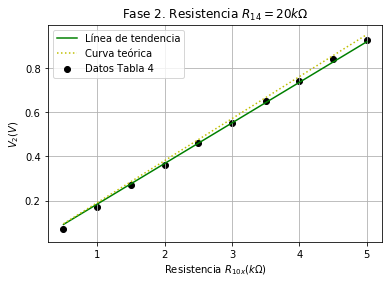

In [30]:
''' plot Resistencia 10 variable
    label: Datos Tabla 4  '''
fig, ax = plt.subplots(1,1)
name = 'Fase2-R14const'
label = 'Datos Tabla 4'
title = r'Fase 2. Resistencia $R_{14}=20k\Omega$'
xlabel, ylabel = r'Resistencia $R_{10x} (k\Omega)$', r'$V_2 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase2((x,30),*init_pars2)
ftend = lambda x: f2((x,30))

plotting(ax,fig,R10,V21,ftend,fteo,details)

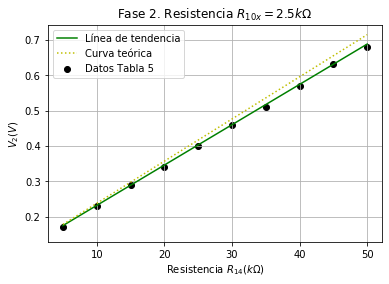

In [31]:
''' plot Resistencia 14 variable
    label: Datos Tabla 5  '''
fig, ax = plt.subplots(1,1)
name = 'Fase2-R10const'
label = 'Datos Tabla 5'
title = r'Fase 2. Resistencia $R_{10x}=2.5k\Omega$'
xlabel, ylabel = r'Resistencia $R_{14} (k\Omega)$', r'$V_2 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase2((2.5,x),*init_pars2)
ftend = lambda x: f2((2.5,x))

plotting(ax,fig,R14,V22,ftend,fteo,details)

# FASE 3

## Voltajes constantes $V_1=0.46V, V_2=0.46V$

In [18]:
''' datos
    R13: resistencia variable
    V31: voltaje medido '''

R13 = np.arange(0,100,10)
V31 = -1*np.array([-0.22,0.01,0.25,0.48,0.71,0.95,1.18,1.42,1.65,1.89])

## Voltaje constante $V_1=5V$ Resistencia constante $R_{13}=50k\Omega$

In [5]:
''' datos
    V2: voltaje variable
    V32: voltaje medido '''

V2 = np.arange(1.5,7.5,2)
V32 = np.array([7.47,-2.53,-12.5])

## Voltaje constante $V_2=5V$ Resistencia constante $R_{13}=50k\Omega$

In [6]:
''' datos
    V1: Voltaje variable
    V22: voltaje medido '''

V1 = np.arange(5.5,13.5,2)
V33 = np.array([-8.35,-2.53,3.47,9.47])

In [19]:
# Arrays con todas las medidas correspondientes 

R13dat = np.hstack((R13,50*np.ones_like(V2),50*np.ones_like(V1)))
V1dat = np.hstack((0.46*np.ones_like(R13),5*np.ones_like(V2),V1)) 
V2dat = np.hstack((0.46*np.ones_like(R13),V2,5*np.ones_like(V1)))
V3dat = np.hstack((V31,V32,V33))

In [20]:
# Función a la que deberían tender los datos r=r13,v=v1,b=v2
def fase3(X,m,n,p):
    r,v,b = X
    return m*v + n*r*v + p*r*b

x3 = (R13dat,V1dat,V2dat)
init_pars3 = [0.5,0.05,-0.1]
pars3,f3 = fitting(fase3,x3,V3dat,init_pars3)
pars3

array([ 0.53253586,  0.04911885, -0.09964481])

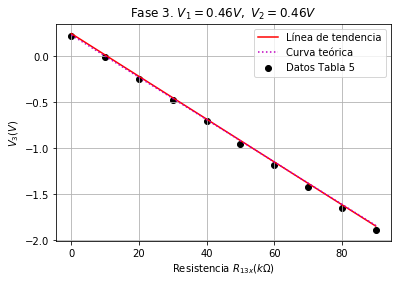

In [21]:
''' plot Resistencia 13 variable
    label: Datos Tabla 5  '''
fig, ax = plt.subplots(1,1)
name = 'Fase3-v1v2const'
label = 'Datos Tabla 5'
title = r'Fase 3. $V_1 = 0.46V, \ V_2 = 0.46V$'
xlabel, ylabel = r'Resistencia $R_{13x} (k\Omega)$', r'$V_3 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase3((x,0.46,0.46),*init_pars3)
ftend = lambda x: f3((x,0.46,0.46))

plotting(ax,fig,R13,V31,ftend,fteo,details)

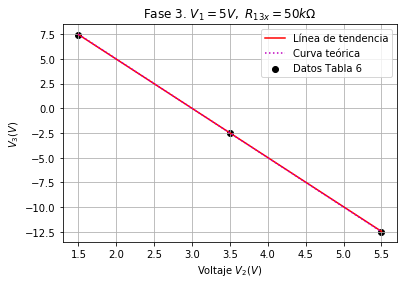

In [22]:
''' plot voltaje 1 variable
    label: Datos Tabla 6  '''
fig, ax = plt.subplots(1,1)
name = 'Fase3-v1r13const'
label = 'Datos Tabla 6'
title = r'Fase 3. $V_1 = 5V, \ R_{13x} = 50k\Omega$'
xlabel, ylabel = r'Voltaje $V_2 (V)$', r'$V_3 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase3((50,5,x),*init_pars3)
ftend = lambda x: f3((50,5,x))

plotting(ax,fig,V2,V32,ftend,fteo,details)

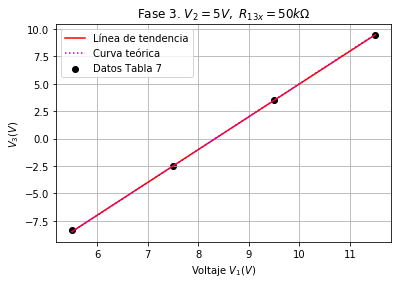

In [23]:
''' plot voltaje 2 variable
    label: Datos Tabla 7  '''
fig, ax = plt.subplots(1,1)
name = 'Fase3-v2r13const'
label = 'Datos Tabla 7'
title = r'Fase 3. $V_2 = 5V, \ R_{13x} = 50k\Omega$'
xlabel, ylabel = r'Voltaje $V_1 (V)$', r'$V_3 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase3((50,x,5),*init_pars3)
ftend = lambda x: f3((50,x,5))

plotting(ax,fig,V1,V33,ftend,fteo,details)

# FASE 4

## Voltajes constantes $V_2=0.46V, V_3=-2.05V$

In [5]:
''' datos
    R20: resistencia variable
    V41: voltaje medido '''

R20 = np.arange(1,11,1)
V41 = np.array([-2.03,-1.54,-1.06,-0.57,-0.07,0.42,0.92,1.43,1.95,2.47])

## Voltaje constante $V_3=-2.05V$ Resistencia constante $R_{20}=5k\Omega$

In [9]:
''' datos
    V2: voltaje variable
    V42: voltaje medido '''

V2 = np.hstack((np.arange(-11.5,0.5,2),np.arange(1.5,15.5,2)))
V42 = np.array([11.9,9.88,7.88,5.88,3.88,1.88,-1.12,-3.12,-5.12,-7.12,-9.12,-11.1,-13.1])

## Voltaje constante $V_2=0.46V$ Resistencia constante $R_{13}=5k\Omega$

In [7]:
''' datos
    V3: Voltaje variable
    V43: voltaje medido '''

V3 = np.hstack((np.arange(-13.5,0.5,2),np.arange(1.5,11.5,2)))
V43 = np.array([-11.7,-9.64,-7.62,-5.59,-3.57,-1.54,0.48,3.52,5.54,7.57,9.59,11.6])

In [10]:
# Arrays con todas las medidas correspondientes 

R20dat = np.hstack((R20,5*np.ones_like(V2),5*np.ones_like(V3)))
V2dat = np.hstack((0.46*np.ones_like(R20),V2,0.46*np.ones_like(V3)))
V3dat = np.hstack((-2.05*np.ones_like(R20),-2.05*np.ones_like(V2),V3)) 
V4dat = np.hstack((V41,V42,V43))

In [15]:
# Función a la que deberían tender los datos r=r20,v=v2,b=v3
def fase4(X,m,n,p):
    r,v,b = X
    return m*r + n*b + p*v

x4 = (R20dat,V2dat,V3dat)
init_pars4 = [0.5,1.0,-1.0]
pars4,f4 = fitting(fase4,x4,V4dat,init_pars4)
pars4

array([ 0.49366585,  1.01290583, -0.99987083])

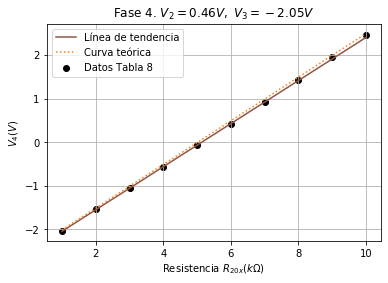

In [18]:
''' plot Resistencia 20 variable
    label: Datos Tabla 8  '''
fig, ax = plt.subplots(1,1)
name = 'Fase4-v2v3const'
label = 'Datos Tabla 8'
title = r'Fase 4. $V_2 = 0.46V, \ V_3 = -2.05V$'
xlabel, ylabel = r'Resistencia $R_{20x} (k\Omega)$', r'$V_4 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase4((x,0.46,-2.05),*init_pars4)
ftend = lambda x: f4((x,0.46,-2.05))

plotting(ax,fig,R20,V41,ftend,fteo,details)

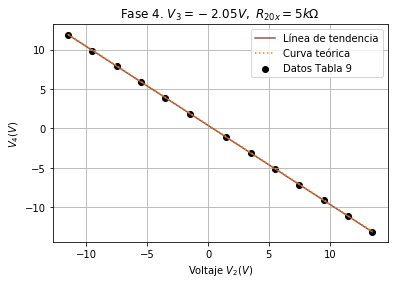

In [21]:
''' plot voltaje 2 variable
    label: Datos Tabla 9  '''
fig, ax = plt.subplots(1,1)
name = 'Fase4-v3r20const'
label = 'Datos Tabla 9'
title = r'Fase 4. $V_3 = -2.05V, \ R_{20x} = 5k\Omega$'
xlabel, ylabel = r'Voltaje $V_2 (V)$', r'$V_4 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase4((5,x,-2.05),*init_pars4)
ftend = lambda x: f4((5,x,-2.05))

plotting(ax,fig,V2,V42,ftend,fteo,details)

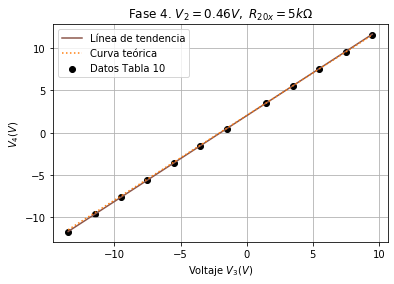

In [22]:
''' plot voltaje 3 variable
    label: Datos Tabla 10  '''
fig, ax = plt.subplots(1,1)
name = 'Fase4-v2r20const'
label = 'Datos Tabla 10'
title = r'Fase 4. $V_2 = 0.46V, \ R_{20x} = 5k\Omega$'
xlabel, ylabel = r'Voltaje $V_3 (V)$', r'$V_4 (V)$'
details = (name,title,label,xlabel,ylabel)
fteo = lambda x: fase4((5,0.46,x),*init_pars4)
ftend = lambda x: f4((5,0.46,x))

plotting(ax,fig,V3,V43,ftend,fteo,details)